In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

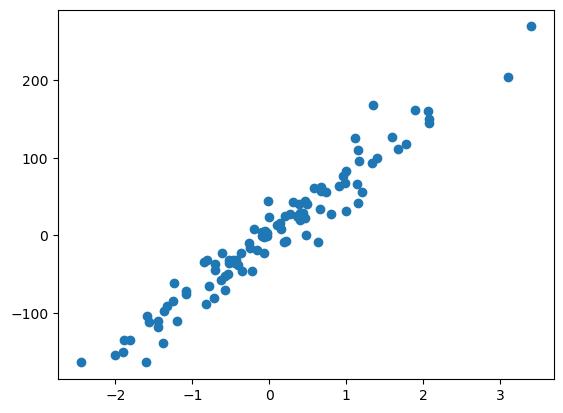

In [2]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20)
plt.scatter(x,y)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(x,y)

LinearRegression()

In [7]:
print(lr.coef_)

[73.78519874]


In [8]:
print(lr.intercept_)

-0.7457050681974198


In [9]:
m = 29.19

In [10]:
class GDRegressor:
    def __init__(self, learning_rate,epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,x,y):
        # calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y - self.m*x.ravel()- self.b)
            loss_slope_m = -2*np.sum((y-self.m*x.ravel() - self.b)*x.ravel())
            self.b -= self.lr*loss_slope_b
            self.m -= self.lr*loss_slope_m
        print(self.b, self.m)
    def predict(self,x):
        return self.m*x+self.b

In [11]:
gd = GDRegressor(0.001, 50)

In [12]:
gd.fit(x_train, y_train)

-1.345017186437763 72.58601204800962


In [13]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.84465289084274